# import library

In [ ]:
!pip install sastrawi

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import datetime as dt
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.corpus import stopwords
stopwords=  nltk.corpus.stopwords.words('indonesian')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Data Gatering

In [ ]:
!gdown --id 1P20Y87o1SR87sk28OlANgNF0S296lHK_

ppn = pd.read_csv('ppn12%.csv')
ppn.head()

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1P20Y87o1SR87sk28OlANgNF0S296lHK_
To: /content/ppn12%.csv
100% 706k/706k [00:00<00:00, 82.1MB/s]


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1873096458834198748,Sun Dec 29 02:23:45 +0000 2024,0,@garudadidada10 PPN 12% untuk meningkatkan kua...,1873193156688396523,NaN,garudadidada10,in,NaN,0,0,0,https://x.com/galar_rajasa/status/187319315668...,1711578720434282496,galar_rajasa
1,1873096324750655799,Sun Dec 29 02:22:43 +0000 2024,0,@garudadidada10 PPN 12% untuk mendanai program...,1873192897941783000,NaN,garudadidada10,in,NaN,0,0,0,https://x.com/raharja_frgntr/status/1873192897...,1709477576073424896,raharja_frgntr
2,1873096458834198748,Sun Dec 29 02:22:38 +0000 2024,0,@garudadidada10 PPN 12% akan mendukung pengemb...,1873192875464507461,NaN,garudadidada10,in,NaN,0,0,0,https://x.com/Irma_lestari22/status/1873192875...,1699353207338868736,Irma_lestari22
3,1873192671130599690,Sun Dec 29 02:21:49 +0000 2024,0,Harganya naek gara2 ppn 12% sih,1873192671130599690,NaN,NaN,in,designer,0,0,0,https://x.com/sugcessful/status/18731926711305...,1125613059244867585,sugcessful
4,1873192669989703790,Sun Dec 29 02:21:49 +0000 2024,0,Jokowi Ikut Tertuduh soal Kenaikan PPN 12 Pers...,1873192669989703790,NaN,NaN,in,NaN,0,0,0,https://x.com/TribunWow/status/187319266998970...,803335130148286464,TribunWow


In [ ]:
ppn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      2010 non-null   int64 
 1   created_at               2010 non-null   object
 2   favorite_count           2010 non-null   int64 
 3   full_text                2010 non-null   object
 4   id_str                   2010 non-null   int64 
 5   image_url                484 non-null    object
 6   in_reply_to_screen_name  946 non-null    object
 7   lang                     2010 non-null   object
 8   location                 1087 non-null   object
 9   quote_count              2010 non-null   int64 
 10  reply_count              2010 non-null   int64 
 11  retweet_count            2010 non-null   int64 
 12  tweet_url                2010 non-null   object
 13  user_id_str              2010 non-null   int64 
 14  username                 2010 non-null  

In [ ]:
#merename kolom full text menjadi content
ppn.rename(columns={'full_text' : 'content'}, inplace = True)

#menghapus colom yang tidak dibutuhkan
ppn.drop(['conversation_id_str', 'created_at', 'favorite_count', 'id_str', 'image_url', 'in_reply_to_screen_name', 'lang',
                   'location', 'quote_count', 'reply_count', 'retweet_count', 'tweet_url', 'user_id_str', 'username'] ,axis=1, inplace=True)

ppn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  2010 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


data berjumlah 2010 dan tidak ada missing value

In [ ]:
ppn.head()

,content
0,@garudadidada10 PPN 12% untuk meningkatkan kua...
1,@garudadidada10 PPN 12% untuk mendanai program...
2,@garudadidada10 PPN 12% akan mendukung pengemb...
3,Harganya naek gara2 ppn 12% sih
4,Jokowi Ikut Tertuduh soal Kenaikan PPN 12 Pers...


# Data preparation

## Handling Duplicate

In [ ]:
ppn.duplicated().sum()

2

In [ ]:
ppn.drop_duplicates(inplace=True)

In [ ]:
ppn.duplicated().sum()

0

Terdapat 2 duplicate pada data dan sudah di handling dengan menghapus data tersebut

## Data Cleaning

In [ ]:
# Menghapus URL
ppn['content'] = ppn['content'].str.replace(r'https\S+', ' ', regex=True)

# Mengubah menjadi huruf kecil
ppn['content'] = ppn['content'].str.lower()

# Menghapus mention (seperti @username)
ppn['content'] = ppn['content'].str.replace(r'@\S+', ' ', regex=True)

# Menghapus hashtag (seperti #hashtag)
ppn['content'] = ppn['content'].str.replace(r'#\S+', ' ', regex=True)

# Menghapus karakter setelah tanda petik (seperti 'satu menjadi satu)
ppn['content'] = ppn['content'].str.replace(r"\'\w+", ' ', regex=True)

# Menghapus tanda baca
ppn['content'] = ppn['content'].str.replace(r'[^\w\s]', ' ', regex=True)

# Menghapus white space berlebih
ppn['content'] = ppn['content'].str.replace(r'\s+', ' ', regex=True)

# Menghapus angka dalam ulasan
ppn['content'] = ppn['content'].str.replace(r'\d+', ' ', regex=True)

# Menghapus pengulangan karakter berlebih, seperti "aaa" menjadi "aa"
ppn['content'] = ppn['content'].str.replace(r'(.)\1+', r'\1\1', regex=True)

# Membatasi pengulangan kata, seperti "suka suka" menjadi "suka"
ppn['content'] = ppn['content'].str.replace(r'\b(\w+)(?:\W\1\b)+', r'\1', regex=True)

# Menghapus emoji
ppn['content'] = ppn['content'].str.replace(r'[^\w\s,.!?@#%^&*()\[\]{}<>;:/\\|+=~`\'\"-]', ' ', regex=True)

# Menghapus kata "persen"
ppn['content'] = ppn['content'].str.replace(r'\bpersen\b', '', regex=True)

# Menghapus kata yang terdiri dari 2 huruf
ppn['content'] = ppn['content'].str.replace(r'\b\w{2}\b', '', regex=True)

# Menghapus kata yang terdiri dari satu huruf
ppn['content'] = ppn['content'].str.replace(r'\b\w{1}\b', '', regex=True)

In [ ]:
# Fungsi untuk menghapus emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                                u"\U0001F600-\U0001F64F"  # Emoticons
                                u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                                u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                                u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
                                u"\U00002700-\U000027BF"  # Dingbats
                                u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                                u"\U00002600-\U000026FF"  # Miscellaneous Symbols
                                u"\U0001F018-\U0001F270"  # Alphanumeric symbols
                                u"\U0001F600-\U0001F64F"  # Emoticons
                                "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Membersihkan data di kolom 'content'
ppn['content'] = ppn['content'].apply(remove_emoji)

In [ ]:
ppn.head()

,content
0,ppn untuk meningkatkan kualitas layanan tran...
1,ppn untuk mendanai program keberlanjutan
2,ppn akan mendukung pengembangan kota indone...
3,harganya naek gara ppn sih
4,jokowi ikut tertuduh soal kenaikan ppn akui ...


## merubah slang ke standard (normalization)

In [ ]:
!gdown --id 1cXaOtuw6xqWL6KDjZqvkzGYsiyyr0X1y

slangs = open('slang.txt',"r",encoding="utf-8", errors='replace')

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cXaOtuw6xqWL6KDjZqvkzGYsiyyr0X1y
To: /content/slang.txt
100% 32.8k/32.8k [00:00<00:00, 43.0MB/s]


In [ ]:
clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

print(clear_slangs)

[['& ', ' dan'], ['dr ', ' dari'], ['abis ', ' habis'], ['ad ', ' ada'], ['alhmdulillah ', ' alhamdulillah'], ['alhamdulilah ', ' alhamdulillah'], ['alhamdulillaah ', ' alhamdulillah'], ['alhamdulillah ', ' alhamdulillah'], ['adminnya ', ' admin nya'], ['account ', ' akun'], ['asiikk ', ' asyik'], ['alpukatnya ', ' alpukat nya'], ['amin ', ' aamiin'], ['aplikasinnya ', ' aplikasi nya'], ['aplikasinya ', ' aplikasi nya'], ['awesome ', ' luar biasa'], ['asyilk ', ' asyik'], ['antaran ', ' pengantaran'], ['apus ', ' hapus'], ['ampe ', ' sampai'], ['almt ', ' alamat'], ['almat ', ' alamat'], ['alamt ', ' alamat'], ['almtnya ', ' alamatnya'], ['apknya ', ' aplikasinya'], ['antri ', ' antre'], ['adl ', ' adalah'], ['awalnnya ', ' awalnya'], ['asem ', ' asam'], ['alumunium ', ' aluminium'], ['abis ', ' habis'], ['areaku ', ' area saya'], ['alpulat ', ' alpukat'], ['adlah ', ' adalah'], ['applikasi ', ' aplikasi'], ['apps ', ' aplikasi'], ['app ', ' aplikasi'], ['afordable ', ' affordable'], [

In [ ]:
slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'&': 'dan',
 'dr': 'dari',
 'abis': 'habis',
 'ad': 'ada',
 'alhmdulillah': 'alhamdulillah',
 'alhamdulilah': 'alhamdulillah',
 'alhamdulillaah': 'alhamdulillah',
 'alhamdulillah': 'alhamdulillah',
 'adminnya': 'admin nya',
 'account': 'akun',
 'asiikk': 'asyik',
 'alpukatnya': 'alpukat nya',
 'amin': 'aamiin',
 'aplikasinnya': 'aplikasi nya',
 'aplikasinya': 'aplikasi nya',
 'awesome': 'luar biasa',
 'asyilk': 'asyik',
 'antaran': 'pengantaran',
 'apus': 'hapus',
 'ampe': 'sampai',
 'almt': 'alamat',
 'almat': 'alamat',
 'alamt': 'alamat',
 'almtnya': 'alamatnya',
 'apknya': 'aplikasinya',
 'antri': 'antre',
 'adl': 'adalah',
 'awalnnya': 'awalnya',
 'asem': 'asam',
 'alumunium': 'aluminium',
 'areaku': 'area saya',
 'alpulat': 'alpukat',
 'adlah': 'adalah',
 'applikasi': 'aplikasi',
 'apps': 'aplikasi',
 'app': 'aplikasi',
 'afordable': 'affordable',
 'agent': 'agen',
 'agus': 'hangus',
 'apk': 'aplikasi',
 'appsnya': 'aplikasinya',
 'aah': 'ah',
 'apakh': 'apakah',
 'apalgi': 'apal

In [ ]:
clean_text = []
for review in ppn['content']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text.append(' '.join(wordlist))
ppn['final_text'] = clean_text

In [ ]:
clean_text

['ppn untuk meningkatkan kualitas layanan transportasi',
 'ppn untuk mendanai program keberlanjutan',
 'ppn akan mendukung pengembangan kota indonesia',
 'harganya naek gara ppn sih',
 'jokowi ikut tertuduh soal kenaikan ppn akui harus dukung amanat dari undang',
 'ppn adalah langkah positif untuk memperbaiki kualitas hidup rakyat',
 'dengan ppn kita lebih siap untuk membangun sektor industri yang lebih bersih',
 'ppn mendukung pemberdayaan masyarakat lokal',
 'dengan ppn kita dorong pertumbuhan ekonomi yang lebih berkelanjutan',
 'mahasiswa bersuara tolak ppn melalui',
 'ppn memperkuat negara dalam menghadapi perubahan ekonomi global',
 'dengan ppn kita mempercepat pembangunan infrastruktur seluruh indonesia',
 'ppn adalah langkah menuju pengelolaan negara yang lebih maju',
 'kabinet gemuk inefisien koruptor disuruh tobat tidak mau ngeluarin perpu ppn',
 'dengan ppn kita lebih siap untuk menghadapi tantangan ekonomi global',
 'pembangunan lebih merata dengan kenaikan ppn',
 'padahal d

In [ ]:
ppn.head()

,content,final_text
0,ppn untuk meningkatkan kualitas layanan tran...,ppn untuk meningkatkan kualitas layanan transp...
1,ppn untuk mendanai program keberlanjutan,ppn untuk mendanai program keberlanjutan
2,ppn akan mendukung pengembangan kota indone...,ppn akan mendukung pengembangan kota indonesia
3,harganya naek gara ppn sih,harganya naek gara ppn sih
4,jokowi ikut tertuduh soal kenaikan ppn akui ...,jokowi ikut tertuduh soal kenaikan ppn akui ha...


##Tokenizing

In [ ]:
def word_token(tweet):
  return word_tokenize(tweet)

ppn["token"] = ppn['final_text'].apply(lambda tokenize:word_token(str(tokenize)))

ppn.head()

,content,final_text,token
0,ppn untuk meningkatkan kualitas layanan tran...,ppn untuk meningkatkan kualitas layanan transp...,"[ppn, untuk, meningkatkan, kualitas, layanan, ..."
1,ppn untuk mendanai program keberlanjutan,ppn untuk mendanai program keberlanjutan,"[ppn, untuk, mendanai, program, keberlanjutan]"
2,ppn akan mendukung pengembangan kota indone...,ppn akan mendukung pengembangan kota indonesia,"[ppn, akan, mendukung, pengembangan, kota, ind..."
3,harganya naek gara ppn sih,harganya naek gara ppn sih,"[harganya, naek, gara, ppn, sih]"
4,jokowi ikut tertuduh soal kenaikan ppn akui ...,jokowi ikut tertuduh soal kenaikan ppn akui ha...,"[jokowi, ikut, tertuduh, soal, kenaikan, ppn, ..."


## remove stopword

In [ ]:
#remove stopwords
ppn['token'] = ppn['token'].apply(lambda x: [item for item in x if item not in stopwords])
ppn.head()

,content,final_text,token
0,ppn untuk meningkatkan kualitas layanan tran...,ppn untuk meningkatkan kualitas layanan transp...,"[ppn, meningkatkan, kualitas, layanan, transpo..."
1,ppn untuk mendanai program keberlanjutan,ppn untuk mendanai program keberlanjutan,"[ppn, mendanai, program, keberlanjutan]"
2,ppn akan mendukung pengembangan kota indone...,ppn akan mendukung pengembangan kota indonesia,"[ppn, mendukung, pengembangan, kota, indonesia]"
3,harganya naek gara ppn sih,harganya naek gara ppn sih,"[harganya, naek, gara, ppn, sih]"
4,jokowi ikut tertuduh soal kenaikan ppn akui ...,jokowi ikut tertuduh soal kenaikan ppn akui ha...,"[jokowi, tertuduh, kenaikan, ppn, akui, dukung..."


## Stopword

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('popular')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nlt

True

In [ ]:
# menampilkan kata stopwords bahasa indonesia
indonesian_stop = stopwords.words('indonesian')

# menghitung jumlah kata stopwords bahasa indonesia
print('length of indonesian stopwords:', len(indonesian_stop))

length of indonesian stopwords: 758


In [ ]:
# memasukkan stopwords bahasa indonesia ke dalam dataframe

stopwords_indo = pd.DataFrame(indonesian_stop, columns=['stopwords_indonenesia'])

In [ ]:
# menyimpan stopwords bahasa indonesia ke dalam format xlsx
stopwords_indo.to_excel('stopwords_indonesian.xlsx', index=False)

In [ ]:
def remove_stopwords(review_text, indo_stopwords):
  tokenize = []
  for token in review_text:
    if token not in indo_stopwords:
      tokenize.append(token)

  return tokenize

ppn['stop_review'] = ppn['token'].apply(lambda stop: remove_stopwords(stop, indonesian_stop))

ppn.head()

,content,final_text,token,stop_review
0,ppn untuk meningkatkan kualitas layanan tran...,ppn untuk meningkatkan kualitas layanan transp...,"[ppn, meningkatkan, kualitas, layanan, transpo...","[ppn, meningkatkan, kualitas, layanan, transpo..."
1,ppn untuk mendanai program keberlanjutan,ppn untuk mendanai program keberlanjutan,"[ppn, mendanai, program, keberlanjutan]","[ppn, mendanai, program, keberlanjutan]"
2,ppn akan mendukung pengembangan kota indone...,ppn akan mendukung pengembangan kota indonesia,"[ppn, mendukung, pengembangan, kota, indonesia]","[ppn, mendukung, pengembangan, kota, indonesia]"
3,harganya naek gara ppn sih,harganya naek gara ppn sih,"[harganya, naek, gara, ppn, sih]","[harganya, naek, gara, ppn, sih]"
4,jokowi ikut tertuduh soal kenaikan ppn akui ...,jokowi ikut tertuduh soal kenaikan ppn akui ha...,"[jokowi, tertuduh, kenaikan, ppn, akui, dukung...","[jokowi, tertuduh, kenaikan, ppn, akui, dukung..."


##stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
def back_to_root(review_text):
  stop_token = ' '.join(review_text)
  stem = StemmerFactory()
  create_stem = stem.create_stemmer()
  result_stem = create_stem.stem(stop_token)
  return result_stem

ppn['stem_review'] = ppn['stop_review'].apply(lambda stem:back_to_root(stem))
ppn.head()

,content,final_text,token,stop_review,stem_review
0,ppn untuk meningkatkan kualitas layanan tran...,ppn untuk meningkatkan kualitas layanan transp...,"[ppn, meningkatkan, kualitas, layanan, transpo...","[ppn, meningkatkan, kualitas, layanan, transpo...",ppn tingkat kualitas layan transportasi
1,ppn untuk mendanai program keberlanjutan,ppn untuk mendanai program keberlanjutan,"[ppn, mendanai, program, keberlanjutan]","[ppn, mendanai, program, keberlanjutan]",ppn dana program lanjut
2,ppn akan mendukung pengembangan kota indone...,ppn akan mendukung pengembangan kota indonesia,"[ppn, mendukung, pengembangan, kota, indonesia]","[ppn, mendukung, pengembangan, kota, indonesia]",ppn dukung kembang kota indonesia
3,harganya naek gara ppn sih,harganya naek gara ppn sih,"[harganya, naek, gara, ppn, sih]","[harganya, naek, gara, ppn, sih]",harga naek gara ppn sih
4,jokowi ikut tertuduh soal kenaikan ppn akui ...,jokowi ikut tertuduh soal kenaikan ppn akui ha...,"[jokowi, tertuduh, kenaikan, ppn, akui, dukung...","[jokowi, tertuduh, kenaikan, ppn, akui, dukung...",jokowi tuduh naik ppn aku dukung amanat undang


In [ ]:
ppn.to_csv('hasil_prepocessing.csv') #menyimpan hasil preposcessing
ppn.to_excel('hasil_prepocessing.xlsx') #menyimpan hasil preposcessing

Ulasan masih belum mempunyai sentimen sehingga sulit untuk mencari tahu apakah pengguna memberikan ulasan positif atau negatif. Proses pemberian sentimen tidak mungkin dilakukan secara manual dengan melihat ulasan secara satu per satu karena membutuhkan waktu yang lama dan memerlukan seorang ahli di bidang bahasa yang dapat menafsirkan ulasan kemudian mengelompokkan ke sentimen positif dan negatif. Maka dari itu, saya melakukan proses pemberian label sentimen dengan menerapkan metode yang berbasis lexicon atau biasa dikenal dengan lexicon-based method. Kamus yang digunakan adalah InSet Lexicon yang terdiri dari kamus positif dan negatif.

# Data Labeling

In [ ]:
#import pandas as pd
#import numpy as np
#!gdown --id 1aqEWsYqH2g7GB_mLE3m3id45jXWxQ-HO

#ppn = pd.read_excel('/content/hasil_prepocessing.xlsx')

#

In [ ]:
!gdown --id 1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ
To: /content/lexicon_positive_ver1.csv
100% 41.4k/41.4k [00:00<00:00, 73.0MB/s]


In [ ]:
!gdown --id 1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju
To: /content/lexicon_negative_ver1.csv
100% 82.8k/82.8k [00:00<00:00, 63.4MB/s]


In [ ]:
lexicon_positive = dict()
import csv
with open('lexicon_positive_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_negative[row[0]] = int(row[1])

Ulasan diberi score terlebih dahulu dengan menyesuaikan dengan bobot kata yang terdapat di kamus. +5 untuk kata positif dan -5 untuk negatif. Setelah itu, bobot ulasan dijumlahkan kemudian di kelompokkan menjadi sentimen positif, negatif, dan netral. netral ini diartikan sebagai hasil kalkulasi ulasan bernilai 0. Karena fokus analisis ini hanya sentimen positif dan negatif, maka ulasan yang mengandung sentimen netral nanti akan di hilangkan.

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word_pos in text:
    if (word_pos in lexicon_positive):
      score = score + lexicon_positive[word_pos]
  for word_neg in text:
    if (word_neg in lexicon_negative):
      score = score + lexicon_negative[word_neg]
  polarity=''
  if (score > 0):
    polarity = 'positif'
  elif (score < 0):
    polarity = 'negatif'
  else:
    polarity = 'netral'

  return score, polarity

In [ ]:
string = "harga naik gara gara ppn sih"
string = string.split()
hasil = sentiment_analysis_lexicon_indonesia(string)
hasil

(-4, 'negatif')

In [ ]:
ppn['prepos_text'] = ppn.stem_review.str.split()

In [ ]:
results = ppn['prepos_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
ppn['polarity_score'] = results[0]
ppn['polarity'] = results[1]
print(ppn['polarity'].value_counts())

polarity
negatif    1115
positif     602
netral      291
Name: count, dtype: int64


In [ ]:
ppn.to_csv('hasil_labeling.csv') #menyimpan hasil preposcessing
ppn.to_excel('hasil_labeling.xlsx') #menyimpan hasil preposcessing

In [20]:
import pandas as pd
import numpy as np

!gdown --id 1R40ZjxqZq29H8i2xrOvThS1r0HQ1C3hX

ppn = pd.read_csv('hasil_labeling.csv')

ppn.head()

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1R40ZjxqZq29H8i2xrOvThS1r0HQ1C3hX
To: /content/hasil_labeling.csv
100% 1.10M/1.10M [00:00<00:00, 30.5MB/s]


,Unnamed: 0,content,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
0,0,ppn untuk meningkatkan kualitas layanan tran...,ppn untuk meningkatkan kualitas layanan transp...,"['ppn', 'meningkatkan', 'kualitas', 'layanan',...","['ppn', 'meningkatkan', 'kualitas', 'layanan',...",ppn tingkat kualitas layan transportasi,"['ppn', 'tingkat', 'kualitas', 'layan', 'trans...",5,positif
1,1,ppn untuk mendanai program keberlanjutan,ppn untuk mendanai program keberlanjutan,"['ppn', 'mendanai', 'program', 'keberlanjutan']","['ppn', 'mendanai', 'program', 'keberlanjutan']",ppn dana program lanjut,"['ppn', 'dana', 'program', 'lanjut']",1,positif
2,2,ppn akan mendukung pengembangan kota indone...,ppn akan mendukung pengembangan kota indonesia,"['ppn', 'mendukung', 'pengembangan', 'kota', '...","['ppn', 'mendukung', 'pengembangan', 'kota', '...",ppn dukung kembang kota indonesia,"['ppn', 'dukung', 'kembang', 'kota', 'indonesia']",6,positif
3,3,harganya naek gara ppn sih,harganya naek gara ppn sih,"['harganya', 'naek', 'gara', 'ppn', 'sih']","['harganya', 'naek', 'gara', 'ppn', 'sih']",harga naek gara ppn sih,"['harga', 'naek', 'gara', 'ppn', 'sih']",-1,negatif
4,4,jokowi ikut tertuduh soal kenaikan ppn akui ...,jokowi ikut tertuduh soal kenaikan ppn akui ha...,"['jokowi', 'tertuduh', 'kenaikan', 'ppn', 'aku...","['jokowi', 'tertuduh', 'kenaikan', 'ppn', 'aku...",jokowi tuduh naik ppn aku dukung amanat undang,"['jokowi', 'tuduh', 'naik', 'ppn', 'aku', 'duk...",8,positif


In [21]:
# reset index tabel agar urutan menjadi penomoran menjadi lebih rapih
ppn = ppn.reset_index(drop=True)

In [22]:
# menghapus content yang bersentimen netral karena tujuan dari penelitian ini hanya menggunakan 2 sentimen yaitu positif dan negatif
ppn = ppn.drop(ppn[ppn['polarity'] == 'netral'].index)
ppn = ppn.reset_index(drop=True)

print(ppn['polarity'].value_counts())

polarity
negatif    1115
positif     602
Name: count, dtype: int64


# Sentimen Vizualization

<ipython-input-23-ee28e8aa8629>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='polarity', data=ppn, palette="pastel")


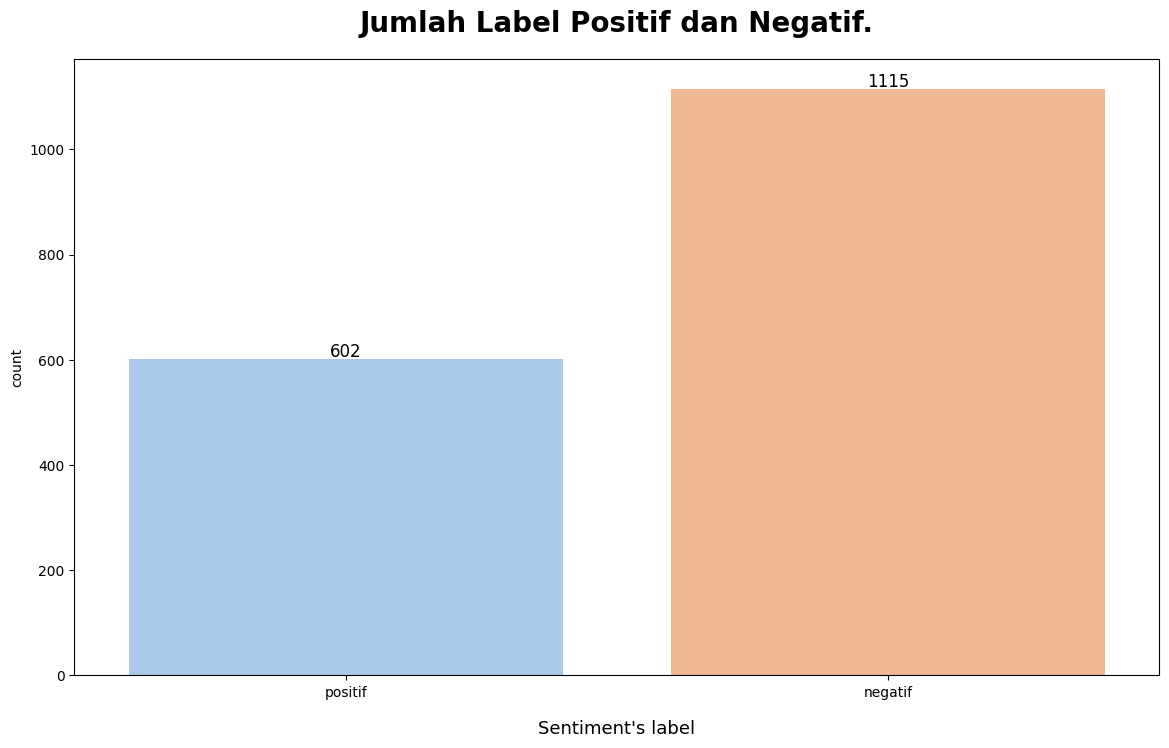

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi bar chart untuk sentimen positif dan negatif
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='polarity', data=ppn, palette="pastel")

# Menambahkan nilai pada bar chart
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 3.25,
            int(rect.get_height()), ha='center', fontsize=12)

# Menambahkan judul dan label
plt.title("Jumlah Label Positif dan Negatif.", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Sentiment's label", fontsize=13, labelpad=15)
plt.ylim(0)  # Mengatur batas y-axis agar tidak ada nilai negatif
plt.show()


In [24]:
# mengonversikan sentimen menjadi 1 untuk positif dan -1 untuk negatif
polarity = []
for convert in ppn['polarity']:
  if convert == "positif":
    num_polarity = 1
  else:
    num_polarity = 0

  polarity.append(num_polarity)
ppn['polarity'] = polarity

ppn['polarity']

,polarity
0,1
1,1
2,1
3,0
4,1
...,...
1712,0
1713,1
1714,1
1715,0


In [25]:
print(ppn['polarity'].value_counts())

polarity
0    1115
1     602
Name: count, dtype: int64


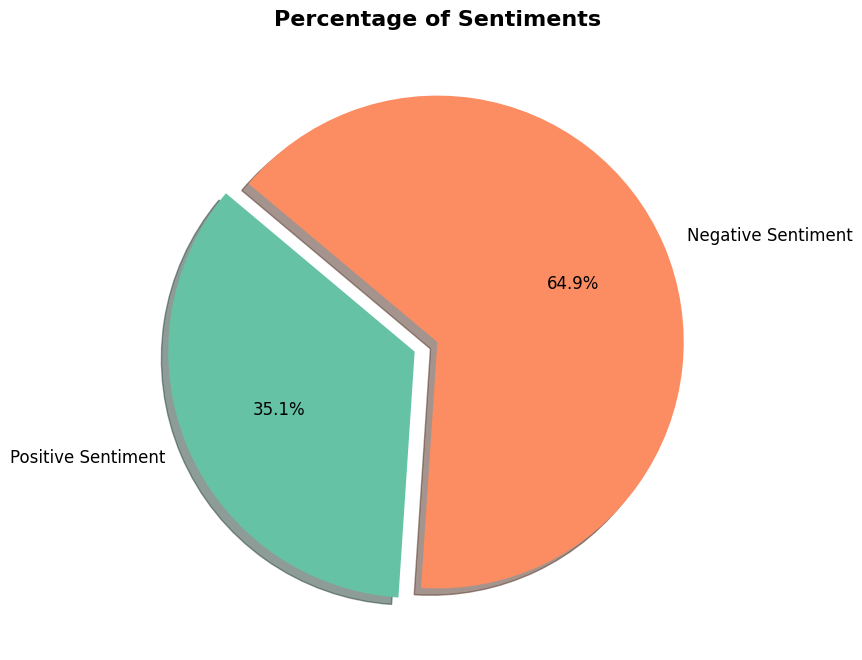

In [ ]:
import matplotlib.pyplot as plt

# Menghitung persentase sentimen
train_pct_pos = ppn.polarity.value_counts()[1] / ppn.polarity.value_counts().sum() * 100
train_pct_neg = ppn.polarity.value_counts()[0] / ppn.polarity.value_counts().sum() * 100

# Menyiapkan data untuk diagram pie
labels = ['Positive Sentiment', 'Negative Sentiment']
sizes = [train_pct_pos, train_pct_neg]
colors = ['#66c2a5', '#fc8d62']  # Warna untuk pie chart
explode = (0.1, 0)  # Memberikan efek meledak untuk bagian pertama (positive sentiment)

# Membuat diagram pie
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140, textprops={'fontsize': 12})

# Menambahkan judul
plt.title("Percentage of Sentiments", fontsize=16, fontweight='bold')
plt.show()


In [26]:
ppn.to_csv('hasil_labeling2.csv')

## Wordcloud

In [ ]:
!gdown --id 1Lhn9xHVcTver1FfdtCkY3uJrmgfmb-ew

import pandas as pd

ppn = pd.read_csv('hasil_labeling2.csv')

ppn.head()

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Lhn9xHVcTver1FfdtCkY3uJrmgfmb-ew
To: /content/hasil_labeling2.csv
100% 1.01M/1.01M [00:00<00:00, 102MB/s]


,Unnamed: 0,content,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
0,0,ppn untuk meningkatkan kualitas layanan tran...,ppn untuk meningkatkan kualitas layanan transp...,"['ppn', 'meningkatkan', 'kualitas', 'layanan',...","['ppn', 'meningkatkan', 'kualitas', 'layanan',...",ppn tingkat kualitas layan transportasi,"['ppn', 'tingkat', 'kualitas', 'layan', 'trans...",5,1
1,1,ppn untuk mendanai program keberlanjutan,ppn untuk mendanai program keberlanjutan,"['ppn', 'mendanai', 'program', 'keberlanjutan']","['ppn', 'mendanai', 'program', 'keberlanjutan']",ppn dana program lanjut,"['ppn', 'dana', 'program', 'lanjut']",1,1
2,2,ppn akan mendukung pengembangan kota indone...,ppn akan mendukung pengembangan kota indonesia,"['ppn', 'mendukung', 'pengembangan', 'kota', '...","['ppn', 'mendukung', 'pengembangan', 'kota', '...",ppn dukung kembang kota indonesia,"['ppn', 'dukung', 'kembang', 'kota', 'indonesia']",6,1
3,3,harganya naek gara ppn sih,harganya naek gara ppn sih,"['harganya', 'naek', 'gara', 'ppn', 'sih']","['harganya', 'naek', 'gara', 'ppn', 'sih']",harga naek gara ppn sih,"['harga', 'naek', 'gara', 'ppn', 'sih']",-1,-1
4,4,jokowi ikut tertuduh soal kenaikan ppn akui ...,jokowi ikut tertuduh soal kenaikan ppn akui ha...,"['jokowi', 'tertuduh', 'kenaikan', 'ppn', 'aku...","['jokowi', 'tertuduh', 'kenaikan', 'ppn', 'aku...",jokowi tuduh naik ppn aku dukung amanat undang,"['jokowi', 'tuduh', 'naik', 'ppn', 'aku', 'duk...",8,1


### Wordcloud Positif

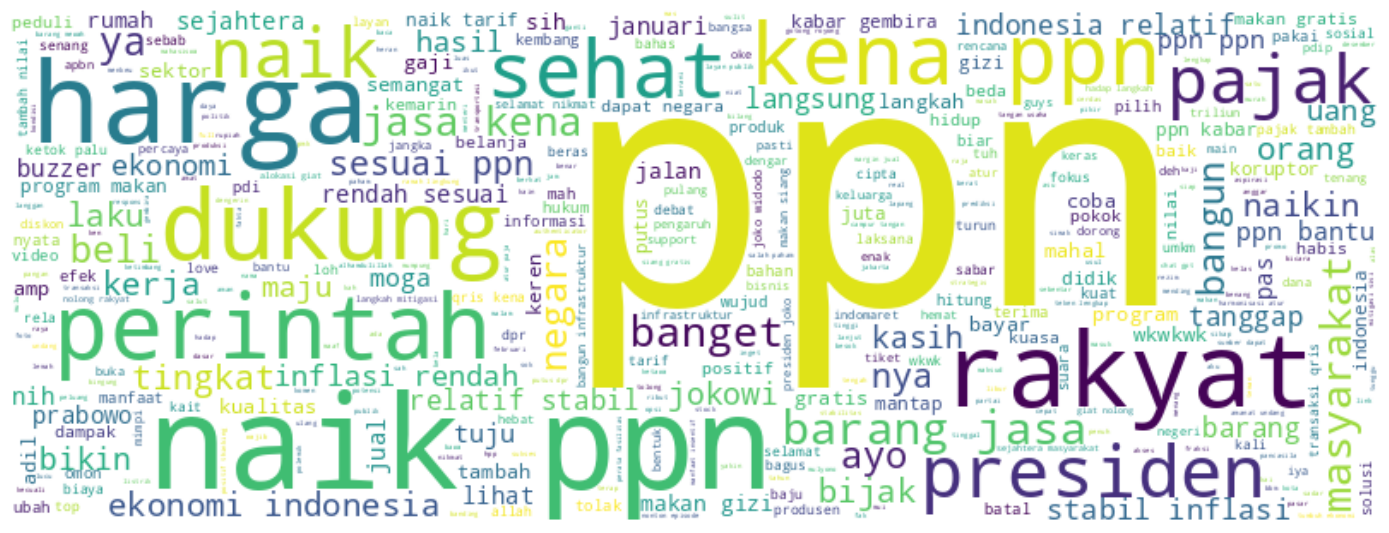

In [ ]:
#install library
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sentiment_pos = ' '.join([review for review in ppn['stem_review'][ppn['polarity'] == 1]])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

### Wordcloud Nergatif

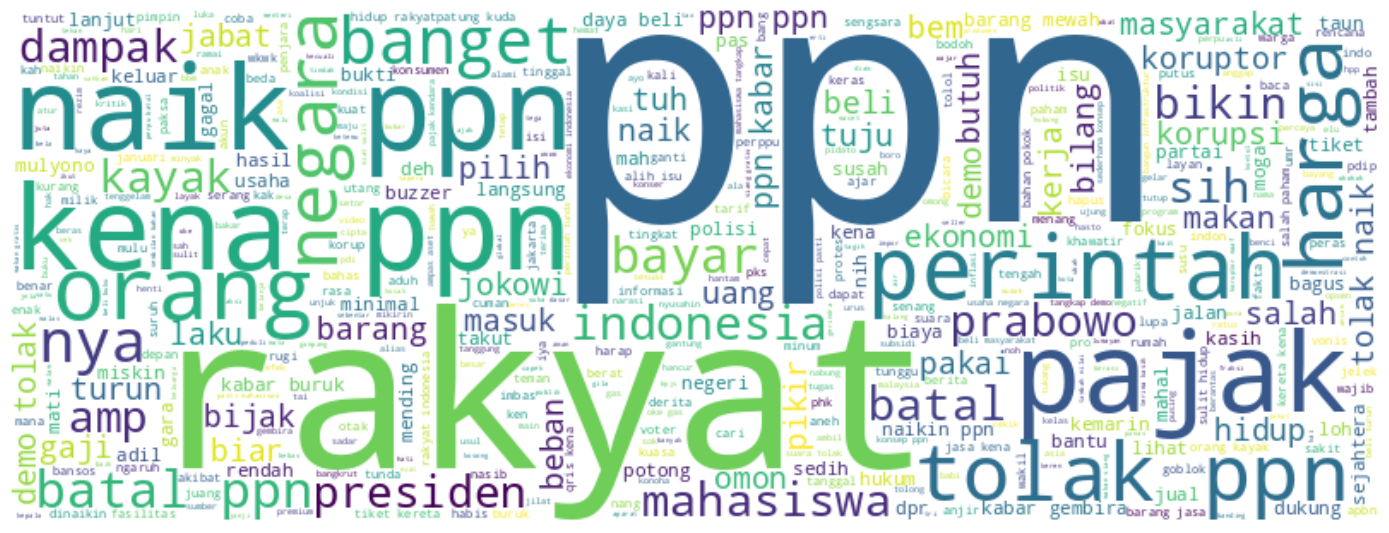

In [ ]:
sentiment_pos = ' '.join([review for review in ppn['stem_review'][ppn['polarity'] == 0]])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

## top 10 kata negatif dan postif

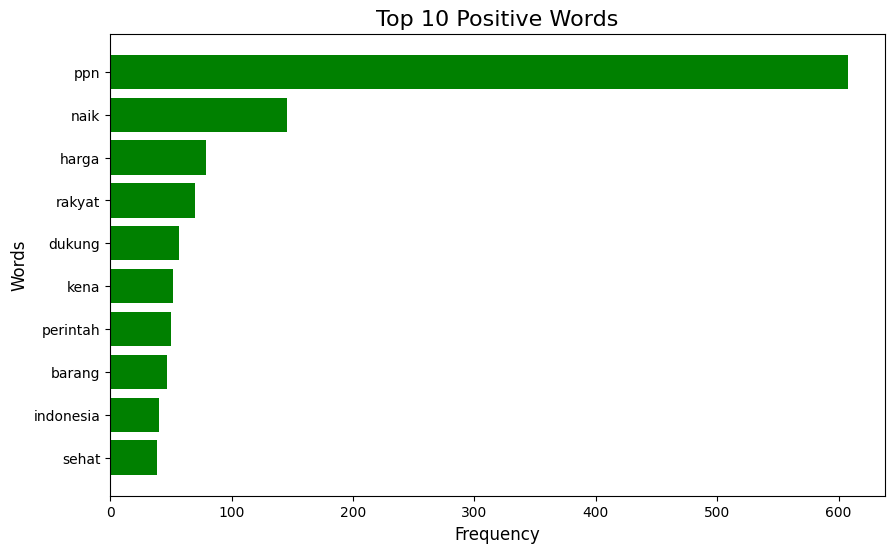

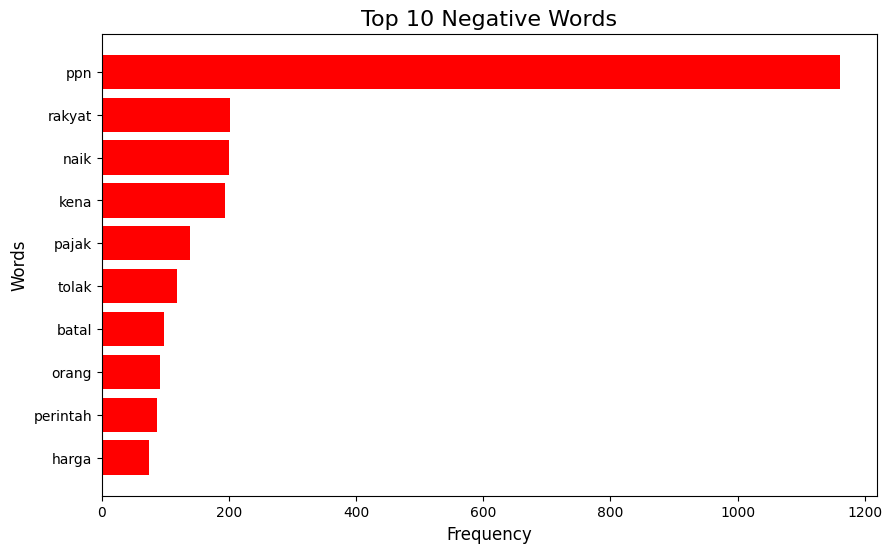

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Pisahkan data positif dan negatif
sentiment_pos = ' '.join([review for review in ppn['stem_review'][ppn['polarity'] == 1]])
sentiment_neg = ' '.join([review for review in ppn['stem_review'][ppn['polarity'] == 0]])

# Fungsi untuk mendapatkan 10 kata yang paling sering muncul
def get_top_n_words(corpus, n=10):
    vectorizer = CountVectorizer(stop_words='english')  # Menghapus kata umum
    X = vectorizer.fit_transform([corpus])
    word_freq = pd.DataFrame(list(zip(vectorizer.get_feature_names_out(), X.toarray().flatten())), columns=["Word", "Frequency"])
    word_freq = word_freq.sort_values(by="Frequency", ascending=False)
    return word_freq.head(n)

# Mendapatkan 10 kata yang paling sering muncul
top_positive_words = get_top_n_words(sentiment_pos, n=10)
top_negative_words = get_top_n_words(sentiment_neg, n=10)

# Visualisasi dengan Bar Chart untuk Positif
plt.figure(figsize=(10, 6))
plt.barh(top_positive_words['Word'], top_positive_words['Frequency'], color='green')
plt.title('Top 10 Positive Words', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.gca().invert_yaxis()  # Membalikkan urutan agar yang paling sering muncul ada di atas
plt.show()

# Visualisasi dengan Bar Chart untuk Negatif
plt.figure(figsize=(10, 6))
plt.barh(top_negative_words['Word'], top_negative_words['Frequency'], color='red')
plt.title('Top 10 Negative Words', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.gca().invert_yaxis()  # Membalikkan urutan agar yang paling sering muncul ada di atas
plt.show()


# Modeling

## 1.Menggunakan model Ml

In [1]:
!gdown --id 1Lhn9xHVcTver1FfdtCkY3uJrmgfmb-ew

import pandas as pd
import numpy as np

ppn = pd.read_csv('hasil_labeling2.csv')

X = ppn['stem_review']
y = ppn['polarity']

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Lhn9xHVcTver1FfdtCkY3uJrmgfmb-ew
To: /content/hasil_labeling2.csv
100% 1.01M/1.01M [00:00<00:00, 17.9MB/s]


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report

# Inisialisasi variabel untuk menyimpan hasil
results = []

# Model yang akan diuji
models = {
    'SVM': SVC(kernel='linear'),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Looping untuk berbagai ukuran test size dan random state
for test_size in np.arange(0.1, 0.4, 0.1):
    for random_state in range(0, 30, 5):
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state)

        # Vectorize data
        vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
        X_train_vect = vectorizer.fit_transform(X_train)
        X_test_vect = vectorizer.transform(X_test)

        for model_name, model in models.items():
            # Train model
            model.fit(X_train_vect, y_train)

            # Predict
            y_pred = model.predict(X_test_vect)

            # Evaluate
            accuracy = accuracy_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred, average='weighted')
            precision = precision_score(y_test, y_pred, average='weighted')

            # Simpan hasil
            results.append({
                'Test Size': test_size,
                'Random State': random_state,
                'Model': model_name,
                'Accuracy': accuracy,
                'Recall': recall,
                'Precision': precision
            })

# Konversi hasil ke DataFrame
results_df = pd.DataFrame(results)

# Urutkan berdasarkan Accuracy
sorted_results = results_df.sort_values(by='Accuracy', ascending=False)

# Tampilkan hasil
print(sorted_results.head(10))


    Test Size  Random State Model  Accuracy    Recall  Precision
20        0.1            25   SVM  0.872093  0.872093   0.871608
16        0.1            20   SVM  0.872093  0.872093   0.873636
4         0.1             5   SVM  0.866279  0.866279   0.872340
28        0.2             5   SVM  0.857558  0.857558   0.863016
44        0.2            25   SVM  0.848837  0.848837   0.846708
32        0.2            10   SVM  0.845930  0.845930   0.843767
24        0.2             0   SVM  0.840116  0.840116   0.838153
8         0.1            10   SVM  0.837209  0.837209   0.835469
84        0.4            15   SVM  0.836972  0.836972   0.837771
64        0.3            20   SVM  0.835271  0.835271   0.833098


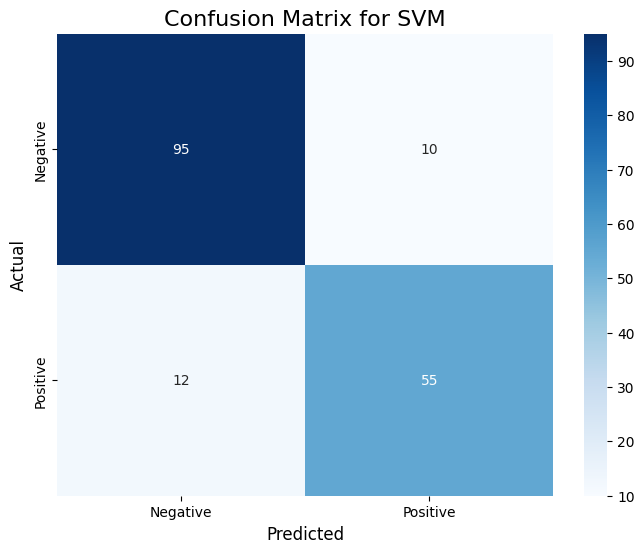

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ambil model terbaik berdasarkan hasil akurasi tertinggi
best_model_info = sorted_results.iloc[0]

# Model terbaik dan parameter terkait
best_model_name = best_model_info['Model']
best_test_size = best_model_info['Test Size']
best_random_state = best_model_info['Random State']

# Split data dengan parameter terbaik
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=best_test_size, random_state=best_random_state)

# Vectorize data
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Pilih model terbaik
best_model = models[best_model_name]

# Latih model terbaik
best_model.fit(X_train_vect, y_train)

# Prediksi dengan model terbaik
y_pred = best_model.predict(X_test_vect)

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title(f'Confusion Matrix for {best_model_name}', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()


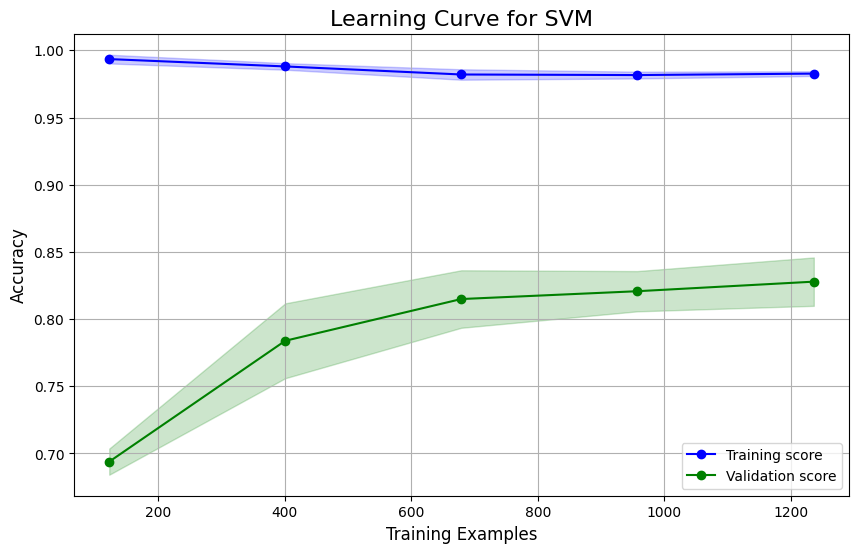

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Ambil informasi model terbaik berdasarkan akurasi tertinggi
best_model_info = sorted_results.iloc[0]
best_model_name = best_model_info['Model']
best_test_size = best_model_info['Test Size']
best_random_state = best_model_info['Random State']

# Split data dengan parameter terbaik
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=best_test_size, random_state=best_random_state)

# Vectorize data
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Pilih model terbaik
best_model = models[best_model_name]

# Fungsi untuk menggambar learning curve
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1
    )

    # Hitung rata-rata dan standar deviasi
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation score')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    plt.title(f'Learning Curve for {best_model_name}', fontsize=16)
    plt.xlabel('Training Examples', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Plot learning curve untuk model terbaik
plot_learning_curve(best_model, X_train_vect, y_train)


## 2.Menggunakan Model LSTM

### Spliting diawal untuk mencegah kebocoran data

In [2]:
!gdown --id 1Lhn9xHVcTver1FfdtCkY3uJrmgfmb-ew

import pandas as pd
import numpy as np

ppn = pd.read_csv('hasil_labeling2.csv')

X = ppn['stem_review']
y = ppn['polarity']

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Lhn9xHVcTver1FfdtCkY3uJrmgfmb-ew
To: /content/hasil_labeling2.csv
100% 1.01M/1.01M [00:00<00:00, 13.4MB/s]


In [3]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

#spliting data terbaik dari model ML
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2, random_state=42)

In [4]:
# Mengecek nilai unik di kolom 'kolom'
unique_values = ppn['polarity'].unique()
print(unique_values)

[1 0]


### Tokenization dan Squence


Apa Itu Tokenization dan Padding?
1. Tokenization adalah proses mengubah teks menjadi angka. Setiap kata diberi indeks unik (token) berdasarkan kamus yang dibuat dari teks.
2. Padding digunakan untuk menyamakan panjang setiap sequence (urutan kata) agar bisa diproses dalam model, terutama model seperti LSTM yang membutuhkan input dengan ukuran yang seragam.

In [5]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import KeyedVectors
from tensorflow.keras.initializers import Constant

# 1. Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<unk>")  # Batasi jumlah kata yang digunakan dan tentukan token OOV
tokenizer.fit_on_texts(X_train)  # Fit tokenizer pada data latih

# Ubah teks menjadi urutan bilangan integer
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Tentukan panjang maksimum urutan
MAX_SEQ_LENGTH = max(len(tokens) for tokens in X_train_seq)

# Padding untuk urutan yang lebih pendek agar memiliki panjang yang sama
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQ_LENGTH, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQ_LENGTH, padding='post')


In [6]:
# Print the padded sequences for X_train and X_test
print("X_train_padded:")
print(X_train_pad)
print("\nX_test_padded:")
print(X_test_pad)

X_train_padded:
[[264   2  86 ...   0   0   0]
 [440   0   0 ...   0   0   0]
 [542  17 184 ...   0   0   0]
 ...
 [675 286 816 ...   0   0   0]
 [471   7 326 ...   0   0   0]
 [ 17   8   2 ...   0   0   0]]

X_test_padded:
[[   5    2   29 ...    0    0    0]
 [  17    8    2 ...    0    0    0]
 [  29   49    5 ...    0    0    0]
 ...
 [1586    5    2 ...    0    0    0]
 [  62    3    6 ...    0    0    0]
 [ 810  207  207 ...    0    0    0]]


### Membuat Embedding Matrix dengan Pretrained Word2Vec

In [7]:
!gdown --id 1YUQ0FZ2oPhsCWl0E574YmbNwiJENLBXJ

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1YUQ0FZ2oPhsCWl0E574YmbNwiJENLBXJ
To: /content/word2vec-300.wordvectors
100% 1.20M/1.20M [00:00<00:00, 52.5MB/s]


In [8]:
# 2. Memuat model Word2Vec
WORD_EMBEDDING_PATH = 'word2vec-300.wordvectors'  # Path ke model Word2Vec
word2vec_model = KeyedVectors.load(WORD_EMBEDDING_PATH, mmap='r')

EMBEDDING_SIZE = 300  # Ukuran vektor embedding (misal, 300 dimensi untuk Word2Vec)

# 3. Membuat Matriks Embedding
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, EMBEDDING_SIZE))  # Matriks embedding kosong

# Loop untuk mencocokkan kata dalam tokenizer dengan vektor embedding dari model Word2Vec
for word, i in tokenizer.word_index.items():
    if word in word2vec_model:  # Jika kata ada dalam model Word2Vec
        embedding_matrix[i] = word2vec_model[word]  # Ambil vektor embedding dari Word2Vec dan masukkan ke dalam matriks embedding

# 4. Verifikasi Matriks Embedding
print(f"Ukuran matriks embedding: {embedding_matrix.shape}")

Ukuran matriks embedding: (3461, 300)


In [9]:
print(embedding_matrix[7])

[ 2.60094762e-01 -3.00633945e-02  1.33526608e-01  7.03426152e-02
  2.39216283e-01 -1.55561015e-01 -1.37429789e-01  1.67709023e-01
 -1.31988794e-01 -1.09287158e-01  3.01942118e-02 -1.47653058e-01
 -9.66098905e-03  2.01852173e-02 -2.89273590e-01 -1.03945374e-01
  1.91294607e-02  2.14643240e-01 -1.24290042e-01 -1.35464417e-02
  1.05205357e-01  2.61803359e-01 -4.38989699e-01 -9.09542963e-02
 -1.30321190e-01 -3.98463868e-02  2.79238098e-03 -2.50221193e-01
  4.77729831e-04  8.70288983e-02  2.45127887e-01  2.22397193e-01
 -6.84429258e-02 -7.85679892e-02 -7.01512024e-02 -1.37148604e-01
  7.20791146e-03  3.53079624e-02 -3.09587598e-01 -1.71647847e-01
 -3.57647873e-02  7.52554312e-02 -6.19388223e-02  2.15962045e-02
 -1.96834162e-01  2.58531347e-02 -1.65515631e-01 -1.24295820e-02
  1.89716458e-01  1.55822054e-01  1.60250738e-01  8.12133774e-02
 -1.13858163e-01 -5.83857633e-02  4.12559994e-02 -1.27738759e-01
  2.19046369e-01 -8.22724402e-02 -2.32067302e-01 -1.39598534e-01
 -2.27931410e-01  1.15532

### Architecture

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import GlobalMaxPool1D
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

# Membuat model sederhana
model = Sequential()

# Layer embedding dengan pretrained embedding matrix
model.add(Embedding(
    input_dim=len(tokenizer.word_index) + 1,  # Ukuran vocabulary
    output_dim=EMBEDDING_SIZE,                # Dimensi embedding
    embeddings_initializer=Constant(embedding_matrix),  # Pretrained embedding
    input_length=MAX_SEQ_LENGTH,              # Panjang sequence
))

# Layer LSTM untuk pemrosesan urutan
model.add(LSTM(128, dropout=0.5, return_sequences=True))
model.add(LSTM(128, dropout=0.5, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Dense layer untuk klasifikasi
model.add(Dense(1, activation='sigmoid'))  # Output layer untuk binary classification

# Compile model
model.compile(Adam(learning_rate=3e-3), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

#Latih model
history = model.fit(
    X_train_pad,
    y_train,
    epochs=1,
    batch_size=64,
    validation_data=(X_test_pad, y_test)
)

Epoch 1/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 259ms/step - accuracy: 0.6276 - loss: 0.6706 - precision_3: 0.2615 - recall_3: 0.0232 - val_accuracy: 0.6802 - val_loss: 0.5725 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 287ms/step - accuracy: 0.6998 - loss: 0.5482 - precision_3: 0.6161 - recall_3: 0.1978 - val_accuracy: 0.8023 - val_loss: 0.4520 - val_precision_3: 0.6615 - val_recall_3: 0.7818
Epoch 3/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 282ms/step - accuracy: 0.8925 - loss: 0.3265 - precision_3: 0.8352 - recall_3: 0.8661 - val_accuracy: 0.8285 - val_loss: 0.4361 - val_precision_3: 0.7297 - val_recall_3: 0.7364
Epoch 4/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 190ms/step - accuracy: 0.9543 - loss: 0.1595 - precision_3: 0.9324 - recall_3: 0.9382 - val_accuracy: 0.8372 - val_loss: 0.6182 - val_precision_3: 0.7077 - val_recall_3: 0.8364
Epoch 5/12
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 363ms/step - accuracy: 0.9718 - loss: 0.1004 - precision_3: 0.9509 - recall_3

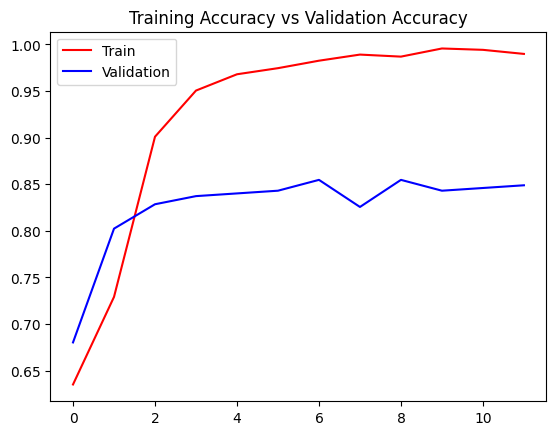

In [49]:
import matplotlib.pyplot as plt

plt.title('Training Accuracy vs Validation Accuracy')

plt.plot(history.history['accuracy'], color='red',label='Train')
plt.plot(history.history['val_accuracy'], color='blue',label='Validation')

plt.legend()

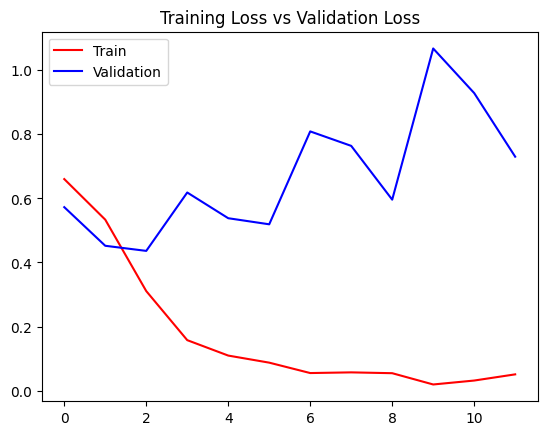

In [50]:
plt.title('Training Loss vs Validation Loss')

plt.plot(history.history['loss'], color='red',label='Train')
plt.plot(history.history['val_loss'], color='blue',label='Validation')

plt.legend()